Search for the optimal strategy using the Value iteration algorithm.

For testing the policy, 10000 episodes are played.
2 of them are printed out (as coordinates of the trajectory of the car), one episode is played at the end using the rendering provided with the environment.

The actions in the first 10 states are printed out.
This information is accompanied by the numbers of times when each of the 10 states appeared at startup.

In [1]:
# imports
import gymnasium as gym
import time


import Q_learning as Ql
import decode_taxi as taxi  # a module for decoding and printing states
import play_episode as play # playing episodes

%matplotlib inline

from collections import Counter  # for the new check

In [2]:
# load the environment.
environment = gym.make('Taxi-v3', render_mode="rgb_array")

Play the episodes.

Learn the policy.

In [3]:
start = time.time()
policy, pi = Ql.Q_learning(environment.env)
done = time.time()


Test the policy.

In [4]:
%%time

elapsed = done - start
print(f'time = {elapsed:.2f} sec \n\n')  # learning: 7.8 sec.


# Number of episodes to play
n_episodes = 10000

print("The policy is represented by a:", type(policy))
# -> functools.partial
print("---")
print("The first values of this policy are:")
print(pi[:10])
# [x 4 4 4 x x x x 0 0]
# (the letters stand for random actions)




# Apply best policy to the real environment
wins, total_reward, average_reward, lst_lst_states = play.play_episodes(environment, n_episodes, policy)


# Checking the number of episodes (among 10000), which started in each of these states.
lst_init_states = [lst[0] for lst in lst_lst_states]
counts_init_states = Counter(lst_init_states)
print("How many episodes started with these states?")
print([counts_init_states[s] for s in range(10)])
# Zeros at indices 0 and 5 (passenger already at the destination) 
# show that these states are excluded from the distribution of initial states,
# in conformity with the documentation of the environment.

print("---------")

iteration_name = 'Q-learning'
print(f'{iteration_name} :: number of wins over {n_episodes} episodes = {wins}')
# 100000 !
print(f'{iteration_name} :: average reward over {n_episodes} episodes = {average_reward}') 
# +7.9 

# print the list of states in the 1st and 2nd episodes.

print("---------")
lst_episode1 = lst_lst_states[0]
print("The 1st episode:")
print(lst_episode1)

print("The trajectory:")
for state in lst_episode1:
    print(taxi.to_str(state))

print("---------")

lst_episode2 = lst_lst_states[1]
print("The 2nd episode:")
print(lst_episode2)

print("The trajectory:")
for state in lst_episode2:
    print(taxi.to_str(state))

print("---------")
lst_init_states = [lst[0] for lst in lst_lst_states]
counts_init_states = Counter(lst_init_states)
print("")

time = 7.54 sec 


The policy is represented by a: <class 'functools.partial'>
---
The first values of this policy are:
[0 4 4 4 0 0 2 0 0 0]
How many episodes started with these states?
[0, 41, 40, 38, 38, 0, 34, 38, 32, 27]
---------
Q-learning :: number of wins over 10000 episodes = 10000
Q-learning :: average reward over 10000 episodes = 7.9548
---------
The 1st episode:
[71, 171, 271, 251, 231, 211, 311, 411, 419, 319, 219, 239, 259, 279, 379, 479, 475]
The trajectory:
(0,3) - passenger: 2 - destination: 3
(1,3) - passenger: 2 - destination: 3
(2,3) - passenger: 2 - destination: 3
(2,2) - passenger: 2 - destination: 3
(2,1) - passenger: 2 - destination: 3
(2,0) - passenger: 2 - destination: 3
(3,0) - passenger: 2 - destination: 3
(4,0) - passenger: 2 - destination: 3
(4,0) - passenger: 4 - destination: 3
(3,0) - passenger: 4 - destination: 3
(2,0) - passenger: 4 - destination: 3
(2,1) - passenger: 4 - destination: 3
(2,2) - passenger: 4 - destination: 3
(2,3) - passenger: 4 - dest

All 10000 episodes were won!

Show one game using the function 'play_one_episode'. The first attempt was adapted from the code of lesson 31.

Well done!
Was the agent successful? True
The total reward for the episode equals: 7
The list of states in this episode: [334, 234, 254, 274, 374, 474, 478, 378, 278, 258, 238, 218, 318, 418, 410]


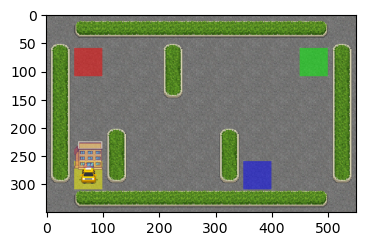

In [5]:

win, total_reward, lst_states, graph_objects = play.play_one_episode(environment, policy, show=True)
print("Was the agent successful?", win)
print("The total reward for the episode equals:", total_reward)
print("The list of states in this episode:", lst_states)

# The list of states is always of length (20 - total_reward + 2)

All 10000 episodes are won.

The trajectories seem to be the shortest ones. The actions in the first 10 states are variable. Indeed, the agent records some random actions in the states 0 and 5, which are unreachable according to both the documentation and the verification above. These random actions are explained by the fact these states did not appear during training.

Learning took much longer, than for Value Iteration.